In [1]:
import sys

if r'D:\Workspace\Pedestrian-Dead-Reckoning' not in sys.path:
    sys.path.append(r'D:\Workspace\Pedestrian-Dead-Reckoning')
    
from pedestrian_data import PedestrianDataset, PedestrianLocus, default_low_pass_filter

dataset = PedestrianDataset(["Magnetometer"], window_size=200,
                            acceleration_filter=default_low_pass_filter)

for name, locus in dataset:
    print("正在遍历移动轨迹{}... \n".format(name))

    for sample in locus:
        for k, v in sample.items():
            print(k + ":" + str(v.shape))
        break

    print(locus.columns_info())
    break

正在遍历移动轨迹NorthEastSouthWest... 

Accelerometer:(200, 4)
Gyroscope:(200, 4)
Magnetometer:(200, 4)
Linear Acceleration:(200, 4)
Location:(200, 9)
{'Accelerometer': Index(['Time (s)', 'Accelerometer.Acceleration x (m/s^2)',
       'Accelerometer.Acceleration y (m/s^2)',
       'Accelerometer.Acceleration z (m/s^2)'],
      dtype='object'), 'Gyroscope': Index(['Time (s)', 'Gyroscope.Gyroscope x (rad/s)',
       'Gyroscope.Gyroscope y (rad/s)', 'Gyroscope.Gyroscope z (rad/s)'],
      dtype='object'), 'Magnetometer': Index(['Time (s)', 'Magnetometer.Magnetic field x (µT)',
       'Magnetometer.Magnetic field y (µT)',
       'Magnetometer.Magnetic field z (µT)'],
      dtype='object'), 'Linear Acceleration': Index(['Time (s)', 'Linear Acceleration.Linear Acceleration x (m/s^2)',
       'Linear Acceleration.Linear Acceleration y (m/s^2)',
       'Linear Acceleration.Linear Acceleration z (m/s^2)'],
      dtype='object'), 'Location': Index(['location_time', 'Latitude (°)', 'Longitude (°)', 'Heig

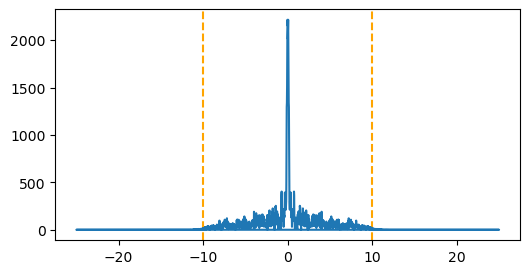

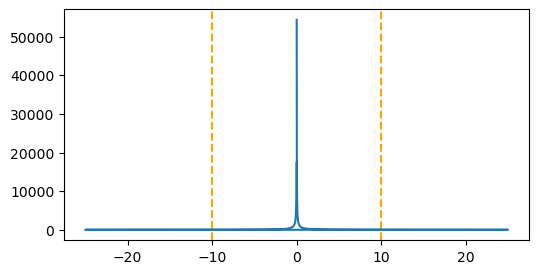

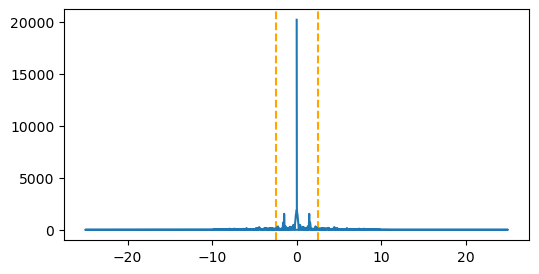

In [2]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrum(sample, name, axis, l):
    locus = dataset[sample]
    
    fig = plt.figure(figsize=(6, 3))
    # Number of samples in normalized_tone
    N = len(locus.data[name])

    yf = fft(locus.data[name][:, axis - 1])
    xf = fftfreq(N, 1 / 50)
    
    plt.axvline(l, linestyle="--", color="orange")
    plt.axvline(-l, linestyle="--", color="orange")
    plt.plot(xf, np.abs(yf))
    plt.show()
    
plot_spectrum("图书馆 转圈", "Accelerometer", 0, 10)
plot_spectrum("图书馆 转圈", "Accelerometer", 1, 10)
plot_spectrum("图书馆 转圈", "Accelerometer", 2, 2.5)

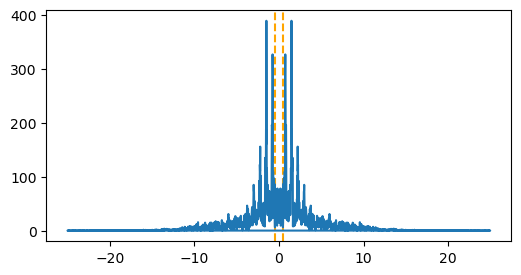

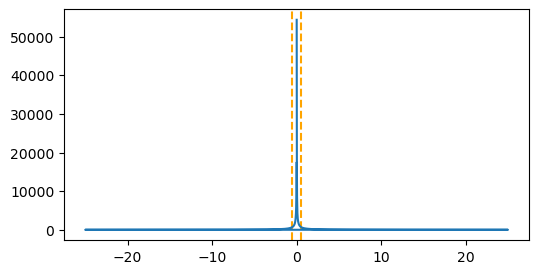

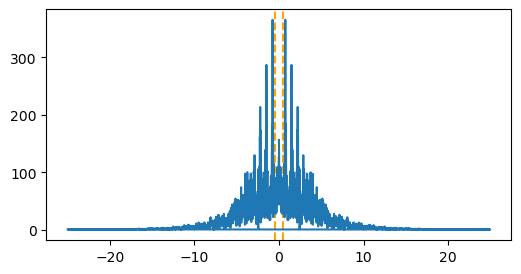

In [3]:
plot_spectrum("图书馆 转圈", "Gyroscope", 0, 0.5)
plot_spectrum("图书馆 转圈", "Gyroscope", 1, 0.5)
plot_spectrum("图书馆 转圈", "Gyroscope", 2, 0.5)